In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn import svm

# 读取数据集

data1 = loadmat('./data/ex6data1.mat')
data2 = loadmat('./data/ex6data2.mat')
data3 = loadmat('./data/ex6data3.mat')
x1 = data1['X']
y1 = data1['y'].flatten()
x2 = data2['X']
y2 = data2['y'].flatten()
x3 = data3['X']
y3 = data3['y'].flatten()
xval = data3['Xval']
yval = data3['yval'].flatten()


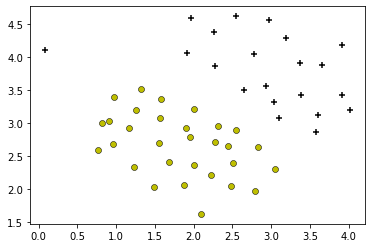

In [3]:

'''可视化数据集'''
def plot_data(x, y):
    p = x[y==1] # 正例
    n = x[y==0] # 反例
    plt.scatter(p[:,0], p[:,1], c='k', marker='+')
    plt.scatter(n[:,0], n[:,1], c='y', marker='o', edgecolors='k', linewidths=0.5)

plot_data(x1, y1)
plt.show()


In [4]:
'''线性核函数模型-样本1'''
clf1 = svm.SVC(C=1, kernel='linear')
clf1.fit(x1, y1)
clf1.predict([[2.0, 4.5]])


array([1], dtype=uint8)

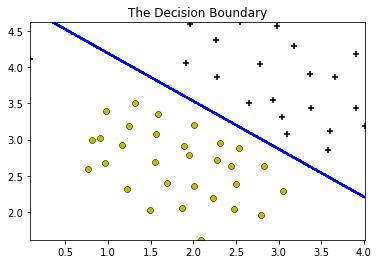

In [9]:
'''画出决策边界'''
def plot_boundary(clf, x1):
    # 生成网格（500*500）
    u = np.linspace(np.min(x1[:,0]), np.max(x1[:,0]), 500)
    v = np.linspace(np.min(x1[:,1]), np.max(x1[:,1]), 500)
    x, y = np.meshgrid(u, v) 
    z = clf.predict(np.c_[x.flatten(), y.flatten()]) # predict要输入一个二维的数据
    z = z.reshape(x.shape) # 重新转为网格
    plt.contour(x, y, z, 1, colors='b') #画等高线
    plt.title('The Decision Boundary')

# 画图
plt.figure(1)
plot_data(x1, y1)
plot_boundary(clf1, x1)
plt.show()


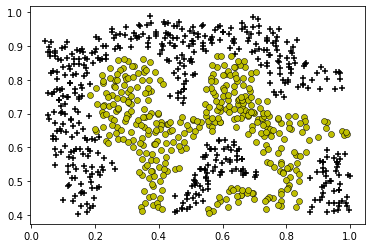

In [10]:
'''============================part2========================='''
'''高斯核函数模型-样本2'''
#可视化训练集
plot_data(x2, y2)
plt.show()

In [16]:
# 定义高斯核函数
def gaussianKernel(x1, x2, sigma=0.1):
    
    """ 完成此函数 """
    diff = np.sum((x1-x2)**2)
    return np.exp(-diff/(2*sigma**2))
a1 = np.array([1, 2, 1])    
a2 = np.array([0, 4, -1])
sigma = 2
gaussianKernel(a1, a2, sigma) #检查是否为0.32465246735834974



0.32465246735834974

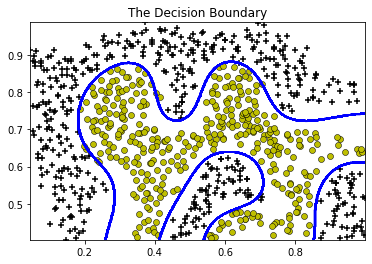

In [18]:
#训练模型（这里使用内置高斯核）
clf2 = svm.SVC(C=1, kernel='rbf', gamma=np.power(0.1, -2)/2) #对应sigma=0.1
# clf2 = svm.SVC(C=1, kernel=gaussianKernel) #gamma=np.power(0.1, -2)/2) #对应sigma=0.1
clf2.fit(x2, y2)


#画图
plt.figure(2)
plot_data(x2, y2)
plot_boundary(clf2, x2)
plt.show()

In [20]:
clf2.predict([[0.4, 0.9]])

array([1], dtype=uint8)

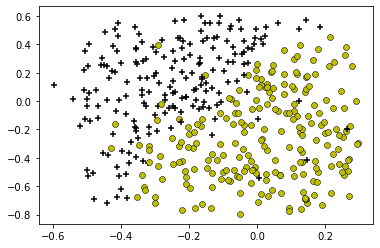

In [19]:
'''============================part3========================='''
'''高斯核函数模型-样本3'''
#可视化训练集
plot_data(x3, y3) 
plot_data(xval, yval) 

In [36]:
try_value = np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30])

#模型选择
def model_selection(try_value, x3, y3, xval, yval):
    
    """ 完成此函数 """
    c = 0
    sigma=0
    acc = 0
    m = yval.shape[0]
    for i_c in try_value:
        for i_sigma in try_value:
            clfi = svm.SVC(C=i_c, kernel='rbf', gamma=np.power(i_sigma, -2)/2)
            clfi.fit(x3, y3)
            pred = np.array(clfi.predict(xval))
            cur_acc = np.sum(pred==yval)/m
            # print(f'c={i_c}, sigma={i_sigma}, accuracy={cur_acc*100}%')
            if(cur_acc > acc):
                acc = cur_acc
                c = i_c
                sigma = i_sigma

    return c, sigma, 1-acc

c, sigma, error = model_selection(try_value, x3, y3, xval, yval)
print(f"choose: c={c} sigma={sigma} error={error}")

choose: c=1.0 sigma=0.1 error=0.03500000000000003


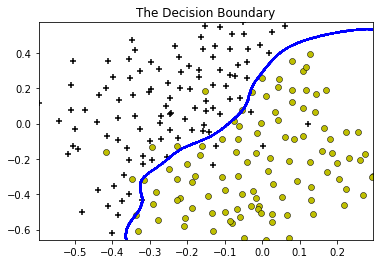

In [34]:
clf3 = svm.SVC(C=c, kernel='rbf', gamma=np.power(sigma, -2)/2)
clf3.fit(x3, y3)

#画图   
plt.figure(3)
plot_data(x3, y3)
plot_boundary(clf3, x3)
plt.show()